In [2]:
#from torchdiffeq import odeint_adjoint as odeint
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as la
from scipy import stats
from scipy import spatial as sp
from scipy import integrate as int
import pandas as pd
#import torch
#import torch.nn as nn
from tqdm import tqdm

In [ ]:
class SOP_model():
    def __init__(self, alpha, t0 = 0):
        self.alpha = alpha
        self.t0 = t0

    def beta(self, t):
        a = np.tanh(self.alpha*(t-self.t0))
        return a

    def f(self, t, x):
        a = -(x+1)
        b = x - self.beta(t)
        c = x - 1
        out = a*b*c
        return out

class SOP_model2():
    def __init__(self, t0 = 0):
        self.t0 = t0

    def beta(self, t):
        a = (t-self.t0)**2
        return a

    def f(self, t, x):
        a = x*(1-x)
        b = x**2
        c = x**2 + self.beta(t)
        out = a + (b/c)
        return out


        


In [ ]:
sop = SOP_model(alpha = 0.9)
sop2 = SOP_model2(t0 = 1)

In [48]:
output = int.solve_ivp(fun = sop2.f, t_span=[0, 10], y0 = [1], method = 'RK45', t_eval=np.linspace(0, 10, 1000))

In [ ]:
#Bifurcation diagram 


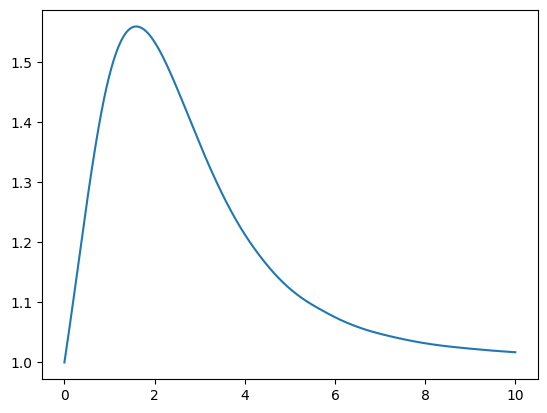

In [50]:
plt.plot(output.t, output.y[0])